In [65]:
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve  # 交叉验证、学习曲线、验证曲线
from sklearn.linear_model import Ridge, LinearRegression  # 线性回归模型
from sklearn.externals import joblib
import matplotlib.pylab as plt  # 可视化
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

- ##岭回归 Ridge
J(θ)=1/2*(Xθ−Y)T*(Xθ−Y)+1/2*α*||θ||2

- ##Lasso回归
J(θ)=1/2*(Xθ−Y)T*(Xθ−Y)+α*||θ||1

# 获得数据

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


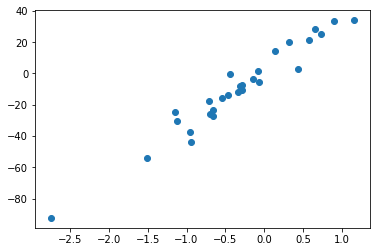

In [124]:
from sklearn.model_selection import train_test_split

X, Y = datasets.make_regression(n_samples=40, n_features=1, noise=6)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = Ridge()

print(model)
plt.scatter(x_train, y_train)

一元线性回归 r-squared 0.9838461973279049
三次线性回归 r-squared -1833.5581327484897


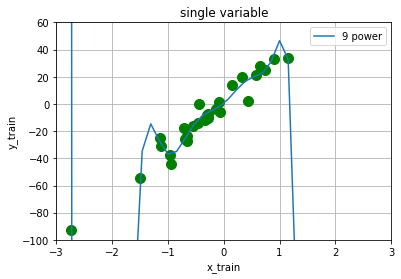

In [248]:

#绘制散点图

plt.plot(x_train, y_train, 'g.',markersize =20)
plt.title('single variable')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.axis([-3, 3, -100, 60])
plt.grid(True)
#线性回归
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y2 = linear_regressor.predict(x_test)
plt.plot(x_test, y2,label = '线性')
plt.legend()

# #多项式回归

polynomial = PolynomialFeatures(degree = 9)#n次多项式
x_transformed = polynomial.fit_transform(x_train)#x每个数据对应的多项式系数

poly_linear_model = LinearRegression()#创建回归器
poly_linear_model.fit(x_transformed, y_train)#训练数据

xx = np.linspace(-3,3,40)#绘制多项式曲线数据
xx_transformed = polynomial.fit_transform(xx.reshape(xx.shape[0], 1))# 把训练好X值的多项式特征实例应用到一系列点上,形成矩阵
yy = poly_linear_model.predict(xx_transformed)
plt.plot(xx, yy,label="9 power")
plt.legend()


# R 方也叫确定系数  介于 0～1 之间的正数  LinearRegression 的 score 方法可以计算 R 方
print('一元线性回归 r-squared', linear_regressor.score(x_test, y_test))

x_test_cubic = polynomial.transform(x_test)
print('三次线性回归 r-squared', poly_linear_model.score(x_test_cubic, y_test))

# 选择正则化强度

In [251]:
alpha = 0.1
alphas = []
R_loss = []
while alpha < 20:
    alphas.append(alpha)
    model.alpha = alpha
    # 交叉验证 分成五组训练集、测试集 
    loss = -cross_val_score(estimator=model, X=X, y=Y, cv=10, scoring='neg_mean_squared_error') 
    # print(model)
    R_loss.append(loss.mean())
    alpha *= 2
# 还原model的alpha为最优值
model.alpha = 15
print(model)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


# 图形化学习率与误差的曲线

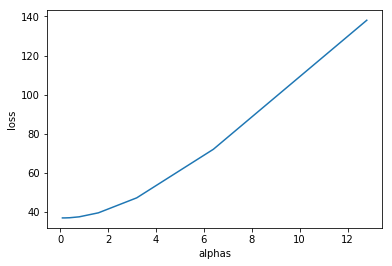

In [203]:
plt.plot(alphas, R_loss)
plt.xlabel('alphas')
plt.ylabel('loss')
plt.show()

# 学习曲线  随训练集样本数变化（用于检测过拟合）
- 1、高方差（过拟合问题） 随着训练集样本增加，训练误差（红色）减小，验证误差（绿色）先减后增
 解决：增加样本数、使用更少的特征、增加惩罚项系数值（正则化强度）      
- 2、高偏差（欠拟合问题） 随着训练集样本增加，训练误差（红色）缓慢增加，验证误差（绿色）缓慢减少
解决：增加特征、增加高维度特征（x1,x2,x1平方,x2平方）、减少惩罚项系数值（正则化强度）  

In [263]:
ridgeModel = Ridge()
ridgeModel.alpha=3

In [264]:
train_sizes, train_loss, test_loss = \
    learning_curve(ridgeModel, X, Y, cv=10, scoring="neg_mean_squared_error",
                   train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# 图形化学习曲线 

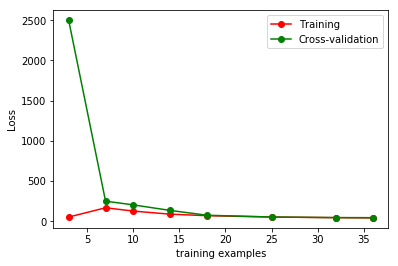

In [265]:

plt.plot(train_sizes, train_loss_mean, '-o',  color="r", label="Training")
plt.plot(train_sizes, test_loss_mean, '-o',  color="g", label="Cross-validation")
plt.xlabel("training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

# 验证曲线(正则化强度alpha曲线)

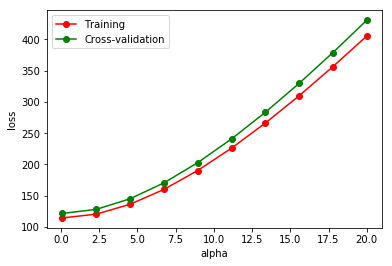

In [19]:
param_range = np.linspace(0.1, 20, num=10)
train_loss, test_loss \
    = validation_curve(model, X, Y, param_name='alpha', 
                       param_range=param_range, cv=10, scoring="neg_mean_squared_error")
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# 图形化验证曲线 
plt.plot(param_range, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g", label="Cross-validation")

plt.xlabel("alpha")
plt.ylabel("loss")
plt.legend(loc="best")
plt.show()

# 模型持久化

In [8]:
# 保存模型到save/lr.pkl
joblib.dump(model, 'save/lr.pkl')
# 读save/lr.pkl模型文件
model1 = joblib.load('save/lr.pkl')
print(model1)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


## 误差分析(人工)
>分析交叉验证集中 错误预测的数据：1、类型 2、特征线索
